In [6]:
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Inicialización de la sesión de Spark
spark = SparkSession.builder \
    .appName("AnalisisDistribucion") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/02/12 06:15:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [14]:
df = spark.read.csv("./registro-de-turismo-de-castilla-y-leon.csv", header=True, inferSchema=True, sep=";")

In [15]:
df.printSchema()

root
 |-- Establecimiento: string (nullable = true)
 |-- N.Registro: string (nullable = true)
 |-- Codigo: string (nullable = true)
 |-- Tipo: string (nullable = true)
 |-- Categoría: string (nullable = true)
 |-- Especialidades: string (nullable = true)
 |-- Clase: string (nullable = true)
 |-- Nombre: string (nullable = true)
 |-- Dirección: string (nullable = true)
 |-- C.Postal: string (nullable = true)
 |-- Provincia: string (nullable = true)
 |-- Municipio: string (nullable = true)
 |-- Localidad: string (nullable = true)
 |-- Nucleo: string (nullable = true)
 |-- Teléfono 1: string (nullable = true)
 |-- Teléfono 2: string (nullable = true)
 |-- Teléfono 3: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- web: string (nullable = true)
 |-- Q Calidad: string (nullable = true)
 |-- Posada Real: string (nullable = true)
 |-- Plazas: integer (nullable = true)
 |-- GPS.Longitud: double (nullable = true)
 |-- GPS.Latitud: double (nullable = true)
 |-- accesible a per

In [17]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 MB 15.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


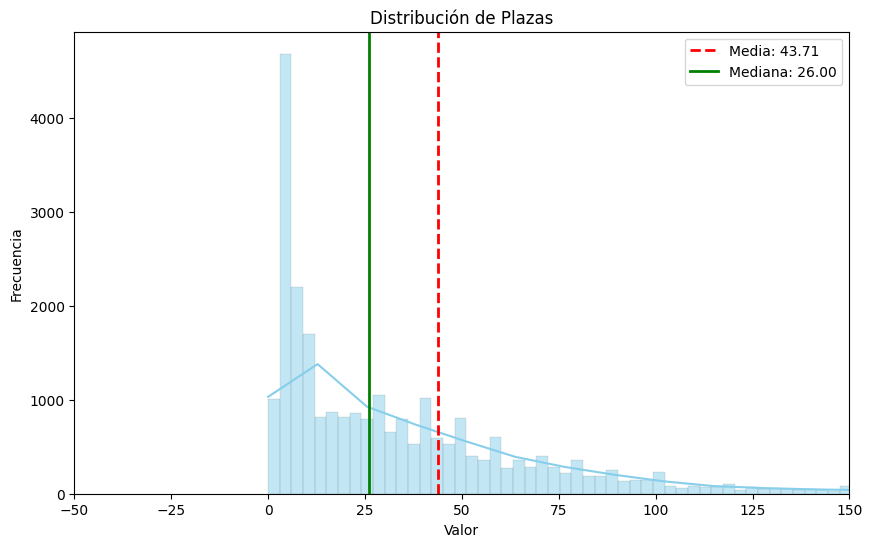

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

df_pandas = df.select("Plazas").toPandas()

val_min = df_pandas["Plazas"].min()
val_max = df_pandas["Plazas"].max()
media = df_pandas["Plazas"].mean()
mediana = df_pandas["Plazas"].median()

plt.figure(figsize=(10, 6))
sns.histplot(df_pandas["Plazas"], kde=True, color="skyblue")

plt.xlim(-50, 150)

# 4. Dibujamos las líneas verticales
# axvline dibuja una línea vertical de arriba a abajo
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')

# 5. Ajustes finales
plt.title(f"Distribución de Plazas")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

# MUY IMPORTANTE: llamar a legend() para que se muestren las etiquetas de media y mediana
plt.legend()

plt.show()

In [34]:
from pyspark.sql import functions as F
stats = df.select(
    F.stddev("Plazas").alias("sigma"),
    F.variance("Plazas").alias("varianza"),
    F.skewness("Plazas").alias("skewness"),
    F.kurtosis("Plazas").alias("curtosis")
)

stats.show()

+-----------------+------------------+-----------------+------------------+
|            sigma|          varianza|         skewness|          curtosis|
+-----------------+------------------+-----------------+------------------+
|72.04329568152967|5190.2364526563115|8.771427692979222|159.41714301589184|
+-----------------+------------------+-----------------+------------------+



**Skewness = 8.77**: valor positivo muy alto, la cola es muy larga hacia la derecha. Hay muchos valores concentrados en la parte baja pero unos pocos tienen valores extremadamente altos.

**Curtosis = 159**: leptocúrtica extrema, valores anormalmente altos en los extremos

**Desviación estándar = 72**: 

# Crop Field Dataset

In [37]:
df_crop = spark.read.csv("./crop_yield_dataset.csv", header=True, inferSchema=True)
df_crop.printSchema()

root
 |-- Crop: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Soil_Type: string (nullable = true)
 |-- Soil_pH: double (nullable = true)
 |-- Rainfall_mm: double (nullable = true)
 |-- Temperature_C: double (nullable = true)
 |-- Humidity_pct: double (nullable = true)
 |-- Fertilizer_Used_kg: double (nullable = true)
 |-- Irrigation: string (nullable = true)
 |-- Pesticides_Used_kg: double (nullable = true)
 |-- Planting_Density: double (nullable = true)
 |-- Previous_Crop: string (nullable = true)
 |-- Yield_ton_per_ha: double (nullable = true)



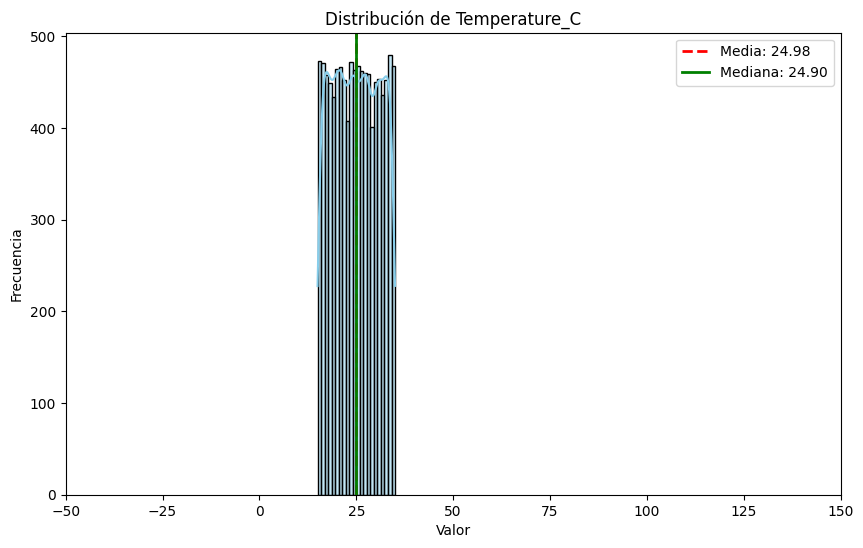

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

col = "Temperature_C"

df_pandas = df_crop.select(col).toPandas()

val_min = df_pandas[col].min()
val_max = df_pandas[col].max()
media = df_pandas[col].mean()
mediana = df_pandas[col].median()

plt.figure(figsize=(10, 6))
sns.histplot(df_pandas[col], kde=True, color="skyblue")

plt.xlim(-50, 150)

plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')

plt.title(f"Distribución de {col}")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.legend()

plt.show()

# Real state

In [45]:
df_real_state = spark.read.csv("./real_state.csv", header=True, inferSchema=True)
df_real_state.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: integer (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: integer (nullable = true)
 |-- TAX: integer (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MEDV: double (nullable = true)



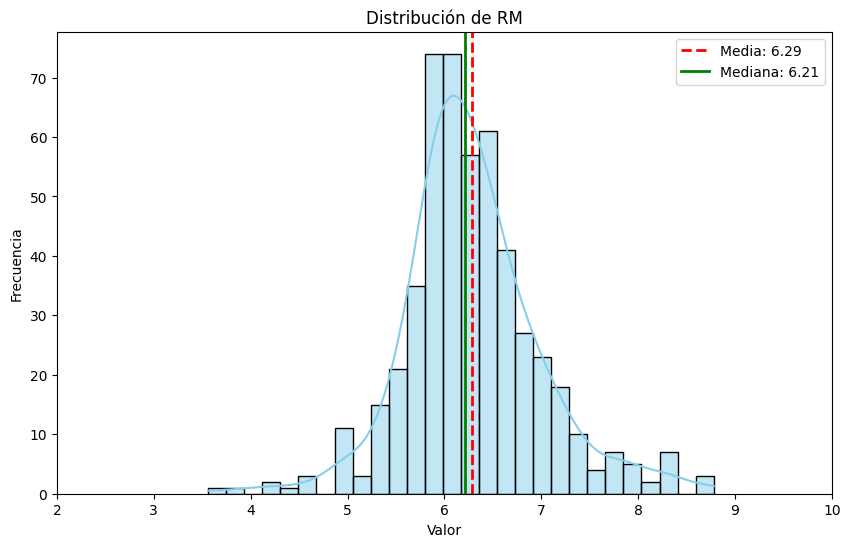

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

col = "RM"

df_pandas = df_real_state.select(col).toPandas()

val_min = df_pandas[col].min()
val_max = df_pandas[col].max()
media = df_pandas[col].mean()
mediana = df_pandas[col].median()

plt.figure(figsize=(10, 6))
sns.histplot(df_pandas[col], kde=True, color="skyblue")

plt.xlim(2, 10)

plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')

plt.title(f"Distribución de {col}")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

plt.legend()

plt.show()

In [48]:
from pyspark.sql import functions as F
stats = df_real_state.select(
    F.stddev("RM").alias("sigma"),
    F.variance("RM").alias("varianza"),
    F.skewness("RM").alias("skewness"),
    F.kurtosis("RM").alias("curtosis")
)

stats.show()

+------------------+------------------+------------------+------------------+
|             sigma|          varianza|          skewness|          curtosis|
+------------------+------------------+------------------+------------------+
|0.7038016463619771|0.4953367574218295|0.3918223554670594|1.8253469991010842|
+------------------+------------------+------------------+------------------+

